In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
print(tf.__version__)

2.17.0


In [3]:
raw_dataset=pd.read_csv("DadasClay_Tr.csv",sep=",")

In [4]:
DadasClay_Tr = raw_dataset.copy()
DadasClay_Tr.head()

,Well,Depth_km,Clay_%,GR,DT,LLD
0,ABDULAZIZ-1,2.734427,69.602826,97.013703,76.998894,1020.006571
1,ABDULAZIZ-1,2.742536,50.278093,95.003130,79.003786,1038.997559
2,ABDULAZIZ-1,2.757119,52.111576,91.000908,78.000081,1153.975963
3,ABDULAZIZ-1,2.794834,43.089280,88.994509,76.006369,1146.997935
4,ABDULAZIZ-1,2.797969,75.802385,115.003146,84.005806,1183.000053


In [5]:
DadasClay_Tr.shape

(595, 6)

In [6]:
DadasClay_Tr.describe()

,Depth_km,Clay_%,GR,DT,LLD
count,595.000000,595.000000,595.000000,595.000000,595.000000
mean,2.839951,42.826131,125.759567,91.346309,1269.843778
std,0.331929,14.368595,23.648433,15.089074,238.479669
min,1.975755,12.781686,74.959382,48.005556,835.647399
25%,2.542979,31.618265,108.004102,83.111008,1082.101427
50%,2.878531,42.797711,127.047619,89.103784,1243.984849
75%,3.074629,52.093373,145.009010,102.010134,1400.897330
max,3.684540,75.906843,171.066561,124.994488,2024.075004


In [7]:
DadasClay_Tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Well      595 non-null    object 
 1   Depth_km  595 non-null    float64
 2   Clay_%    595 non-null    float64
 3   GR        595 non-null    float64
 4   DT        595 non-null    float64
 5   LLD       595 non-null    float64
dtypes: float64(5), object(1)
memory usage: 28.0+ KB


<Figure size 10000x2500 with 0 Axes>

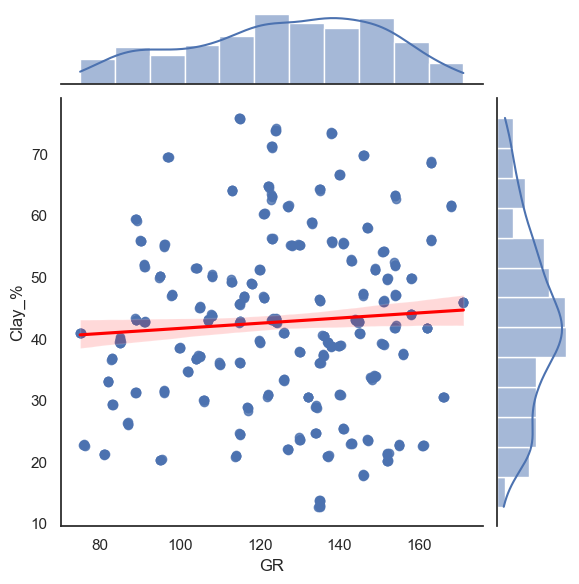

In [8]:
sns.set_theme(style="white")
plt.figure(figsize = (20,5), dpi = (500))
sns.jointplot(x = DadasClay_Tr['GR'], y = DadasClay_Tr['Clay_%'], kind='reg', line_kws={"color": "red"})
font_size =80

<Figure size 10000x2500 with 0 Axes>

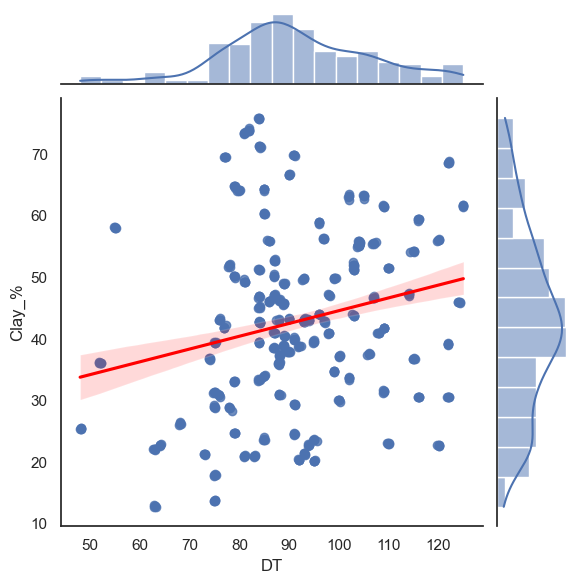

In [9]:
sns.set_theme(style="white")
plt.figure(figsize = (20,5), dpi = (500))
sns.jointplot(x = DadasClay_Tr['DT'], y = DadasClay_Tr['Clay_%'], kind='reg', line_kws={"color": "red"})
font_size =80

<Figure size 10000x2500 with 0 Axes>

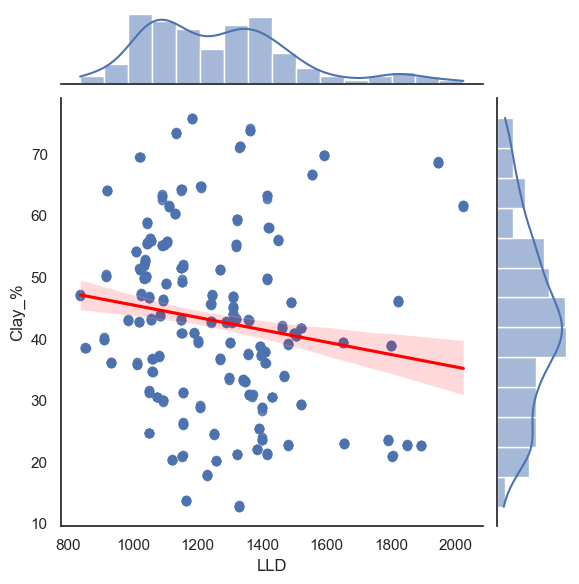

In [10]:
sns.set_theme(style="white")
plt.figure(figsize = (20,5), dpi = (500))
sns.jointplot(x = DadasClay_Tr['LLD'], y = DadasClay_Tr['Clay_%'], kind='reg', line_kws={"color": "red"})
font_size =80

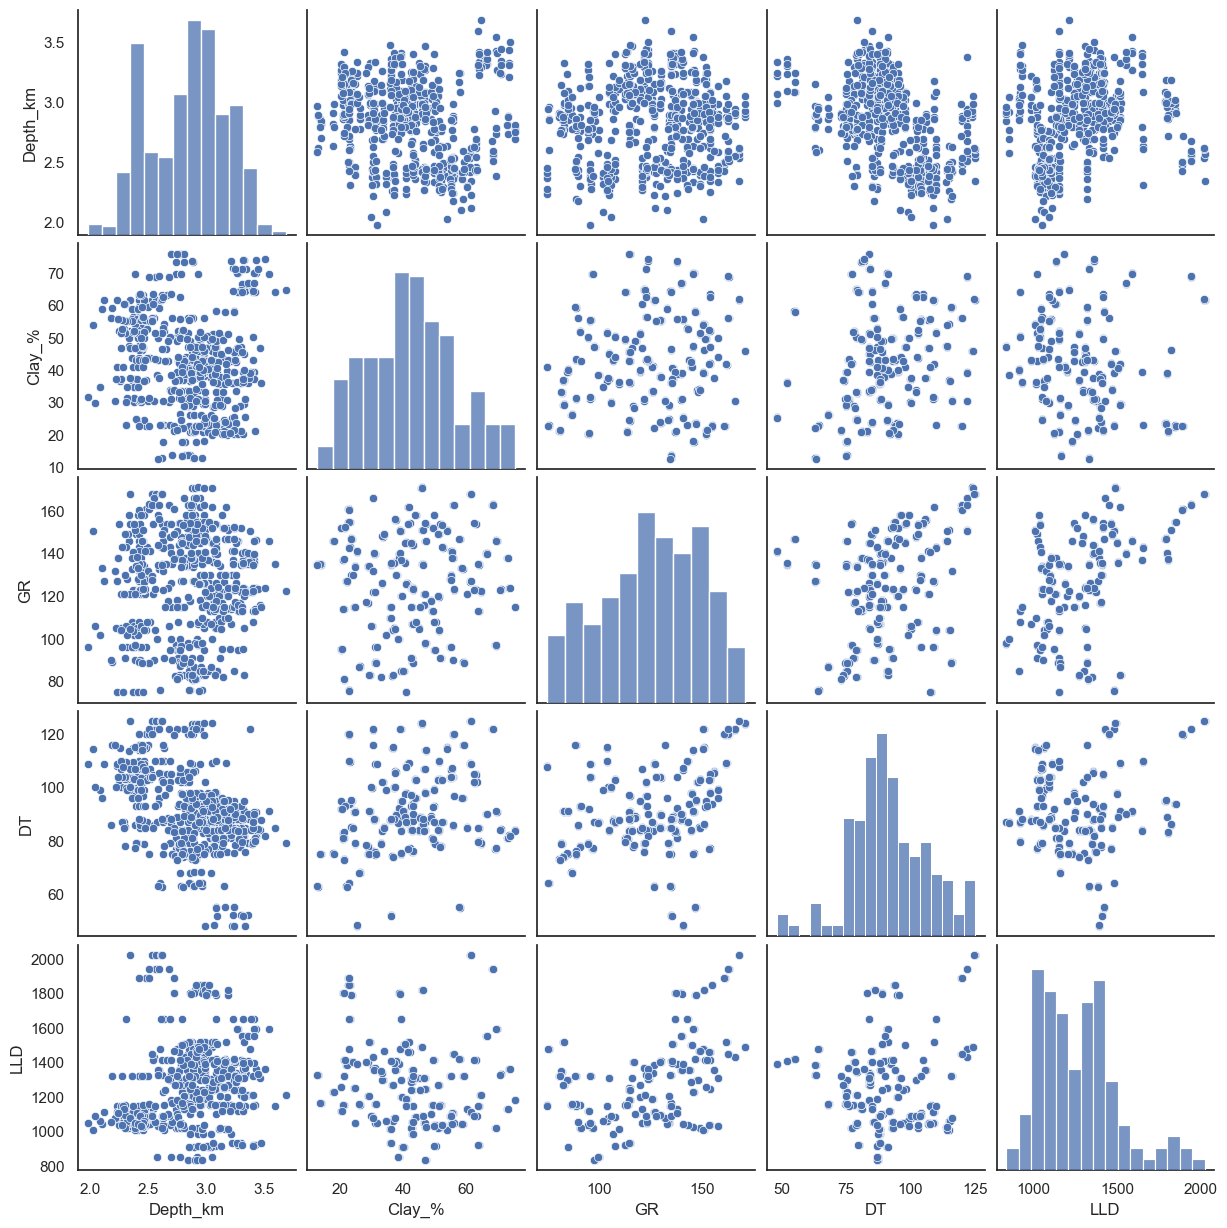

In [11]:
sns.pairplot(DadasClay_Tr)


In [12]:
X = DadasClay_Tr.iloc[:, 3:].values
y = DadasClay_Tr.iloc[:,2].values


In [13]:
X

array([[  97.01370316,   76.99889433, 1020.00657086],
       [  95.00313048,   79.00378615, 1038.99755856],
       [  91.00090829,   78.00008104, 1153.9759628 ],
       ...,
       [ 129.68566616,  103.99536971, 1094.74720744],
       [  95.97255882,  103.96789954, 1319.81888558],
       [ 127.69019028,  103.87242668, 1089.88131477]])

In [14]:
y

array([69.60282577, 50.27809286, 52.11157647, 43.08927976, 75.80238461,
       42.79996774, 73.4072886 , 38.91502575, 33.70046886, 37.60117348,
       43.1018778 , 41.00226412, 39.21402282, 45.99706908, 41.80080298,
       30.61914979, 56.10354979, 29.50239008, 38.89065296, 22.79642394,
       23.61532222, 37.99201922, 39.50394262, 24.59236392, 51.20041699,
       39.40712999, 45.28491234, 33.29695141, 31.00105399, 28.7923584 ,
       40.01114174, 47.19463519, 38.60318181, 43.10862268, 48.97846215,
       40.51256466, 34.00782612, 46.192602  , 41.80115347, 44.10031137,
       31.09597446, 47.21479481, 49.9076859 , 42.80837998, 41.00233109,
       42.78155916, 42.89436523, 49.29036081, 50.28661685, 35.89604288,
       13.79476864, 17.89524345, 28.98248871, 36.79431045, 31.38372158,
       26.30467507, 33.00293853, 22.79345444, 21.003593  , 12.90254259,
       22.19958362, 21.38697814, 22.806655  , 61.50882938, 68.61193481,
       63.28775737, 23.10859487, 21.10060765, 23.69594493, 39.51

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Create an instance of StandardScaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[ 0.90625975, -0.04239016,  1.42962493],
       [-1.56684648,  1.63188946,  0.27152606],
       [ 0.03872088, -0.29287872, -0.30069655],
       ...,
       [ 0.51703561, -0.55667322,  2.34460544],
       [-1.8486542 , -0.83654555,  0.382173  ],
       [ 0.4661598 , -0.22422838,  0.59699723]])

In [18]:
X_test

array([[ 0.42726472, -0.43244351, -0.46456197],
       [-1.29250499, -0.82633486, -0.94053554],
       [-2.12708935, -1.82841169,  0.94952501],
       [ 0.64989901, -0.08021001,  1.27626928],
       [ 0.8881074 , -0.02685983,  1.43023256],
       [ 1.63035578,  2.04648108,  2.9449919 ],
       [-1.50251821, -0.36800275, -0.87346954],
       [ 1.96705853,  2.19177049,  0.99705054],
       [ 0.62827051, -0.17242864,  2.32622237],
       [ 0.42447569, -1.88629964,  0.30483766],
       [-0.08965034,  0.37582018, -0.88932319],
       [-0.13466169, -0.83188512, -0.21037173],
       [ 0.38804007, -1.09085712, -0.22315739],
       [ 1.54587345,  1.89653475,  2.72249554],
       [ 0.65850486, -0.16012483,  2.32573944],
       [-1.55758798, -1.11950598, -0.43827389],
       [-1.20615015, -0.96016345, -1.02208255],
       [ 0.6349291 , -0.22535235,  0.42956948],
       [ 1.09782004,  1.53256512, -1.06477308],
       [ 1.62347168,  1.91070084,  0.82432017],
       [ 1.41539536,  0.3061783 ,  0.218

In [19]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [20]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(512, activation='relu')(input_layer)
dense_layer_2 = Dense(256, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(128, activation='relu')(dense_layer_2)
dense_layer_4 = Dense(64, activation='relu')(dense_layer_3)
dense_layer_5 = Dense(64,activation='relu')(dense_layer_3)
output = Dense(1)(dense_layer_5)
model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [21]:
my_model = model

In [22]:
my_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,593 (682.00 KB)

 Trainable params: 174,593 (682.00 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
history = model.fit(X_train, y_train, batch_size=2, epochs=500, verbose=1, validation_split=0.2)

Epoch 1/500
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.8031 - mean_squared_error: 5.8031 - val_loss: 10.7424 - val_mean_squared_error: 10.7424
Epoch 2/500
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.5565 - mean_squared_error: 5.5565 - val_loss: 15.2907 - val_mean_squared_error: 15.2907
Epoch 3/500
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15.2845 - mean_squared_error: 15.2845 - val_loss: 11.8890 - val_mean_squared_error: 11.8890
Epoch 4/500
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1628 - mean_squared_error: 3.1628 - val_loss: 4.6503 - val_mean_squared_error: 4.6503
Epoch 5/500
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.4921 - mean_squared_error: 6.4921 - val_loss: 10.1287 - val_mean_squared_error: 10.1287
Epoch 6/500
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.8599 - mean_squared_error: 5.8599 - val_loss: 12.6869 - val_mean_squared_error: 12.6869
Epoch 7/500
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.3037 - mean_squared_error: 6.30

<Figure size 10000x2500 with 0 Axes>

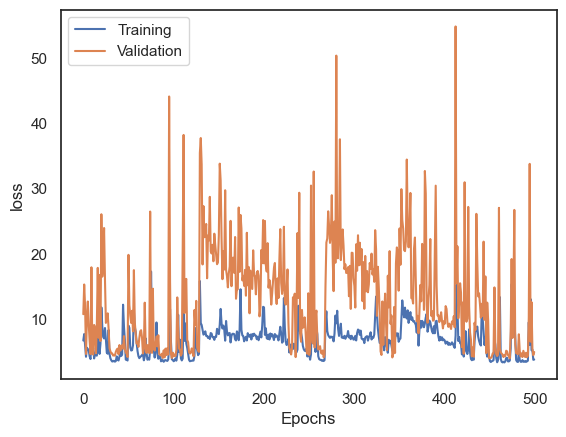

<Figure size 10000x2500 with 0 Axes>

In [137]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Training","Validation"])
plt.figure(figsize = (20,5), dpi = (500))

In [138]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels : ' ,y_test[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicted labels:  [[63.]
 [49.]
 [23.]
 [65.]
 [68.]
 [68.]
 [55.]
 [45.]
 [39.]
 [13.]]
Actual labels :  [64.42778674 50.27809286 22.78754665 66.79007294 69.91034846 68.68796439
 55.95015375 45.90825378 38.89339112 12.88721536]


In [139]:
from sklearn.metrics import r2_score
y_true = np.round(predictions)
y_pred = y_test
r2_score(y_true, y_pred)

0.9724987692908508

<Figure size 15000x2500 with 0 Axes>

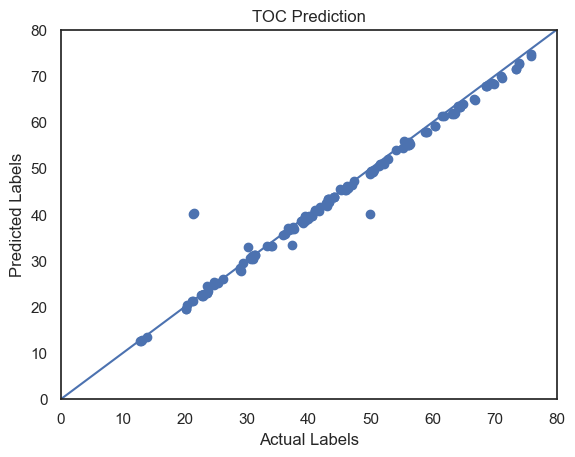

<Figure size 15000x2500 with 0 Axes>

In [140]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('TOC Prediction')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.figure(figsize = (30,5), dpi = (500))

In [141]:
my_model = model

In [142]:
my_tf_saved_model = tf.keras.models.load_model('./saved_models/my_tf_model.keras')

my_tf_saved_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523,781 (2.00 MB)

 Trainable params: 174,593 (682.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 349,188 (1.33 MB)

In [143]:
my_tf_saved_model = tf.keras.models.load_model('./saved_models/my_tf_model.keras')
import pandas as pd


In [144]:
raw_dataset=pd.read_csv("Dadas_Pr.csv",sep=",")

In [145]:
Dadas_Pr = raw_dataset.copy()
Dadas_Pr.head()

,Well,Depth_km,GR,DT,LLD
0,Akcay_1,3.675,120,80,1410
1,Akcay_1,3.680,105,75,1270
2,Akcay_1,3.685,120,79,1210
3,Akcay_1,3.690,140,59,1560
4,Akcay_1,3.695,165,85,1900


In [146]:
X_new =Dadas_Pr.iloc[:, 2:].values

In [147]:
X_new

array([[ 120,   80, 1410],
       [ 105,   75, 1270],
       [ 120,   79, 1210],
       [ 140,   59, 1560],
       [ 165,   85, 1900],
       [ 160,   91, 1950],
       [ 165,   90, 1900],
       [ 130,   84, 1600],
       [ 120,   88, 1350],
       [ 126,   81, 1520],
       [ 140,   82, 1205],
       [ 125,   80, 1390],
       [ 124,   75, 1310],
       [  78,   70, 1453],
       [  76,   67, 1550],
       [  80,   80, 1510],
       [  81,   80, 1460],
       [  80,   81, 1610],
       [ 140,  110, 1400],
       [ 120,  105, 1200],
       [ 120,  104, 1505],
       [ 125,  105, 1510],
       [ 122,  103, 1120],
       [ 124,  106, 1100],
       [ 120,  103, 1600],
       [ 100,   90, 1550]], dtype=int64)

In [148]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit the scaler to your data
sc.fit(X_new)

# Transform your data
X_new = sc.transform(X_new)


In [149]:
X_new

array([[ 0.02163154, -0.50566425, -0.26048877],
       [-0.58096127, -0.88564316, -0.89985433],
       [ 0.02163154, -0.58166003, -1.17386814],
       [ 0.82508861, -2.10157569,  0.42454576],
       [ 1.82940995, -0.12568533,  1.97729069],
       [ 1.62854568,  0.33028936,  2.20563553],
       [ 1.82940995,  0.25429358,  1.97729069],
       [ 0.42336007, -0.20168112,  0.60722163],
       [ 0.02163154,  0.10230202, -0.53450258],
       [ 0.26266866, -0.42966847,  0.24186988],
       [ 0.82508861, -0.35367268, -1.19670263],
       [ 0.2224958 , -0.50566425, -0.35182671],
       [ 0.18232295, -0.88564316, -0.71717846],
       [-1.66562832, -1.26562208, -0.06411221],
       [-1.74597402, -1.49360943,  0.37887679],
       [-1.58528261, -0.50566425,  0.19620092],
       [-1.54510976, -0.50566425, -0.03214393],
       [-1.58528261, -0.42966847,  0.6528906 ],
       [ 0.82508861,  1.77420924, -0.30615774],
       [ 0.02163154,  1.39423033, -1.21953711],
       [ 0.02163154,  1.31823454,  0.173

In [150]:
print(model.predict(X_new))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[50.466103]
 [51.137726]
 [27.968191]
 [46.091946]
 [50.090973]
 [32.312576]
 [47.41406 ]
 [35.75631 ]
 [44.97583 ]
 [34.187748]
 [48.104687]
 [54.54828 ]
 [24.09819 ]
 [28.0447  ]
 [25.134645]
 [48.53835 ]
 [34.70375 ]
 [35.374653]
 [40.115494]
 [46.962723]
 [44.269184]
 [37.23233 ]
 [47.506866]
 [47.104343]
 [42.90228 ]
 [45.037518]]
